In [29]:
import numpy as np
from skimage import data, io, filters
import scipy
from matplotlib import pyplot as plt
from matplotlib import rcParams

import matplotlib.cm as cm


%matplotlib inline


def addZeroPaddings(subImg):
    m,n = subImg.shape
    newImg = np.zeros((m+2,n+2),np.float32)
    for i in range(1,m+1):
        for j in range(1,n+1):
            newImg[i][j] = subImg[i-1][j-1]
    return newImg

def crossCorrelation(img,kernel):
    m,n = img.shape
    x,y = kernel.shape
    newIm = np.copy(img)
    for i in range(0,m-x+1):
        for j in range(0,n-y+1):
            newIm[i+(x/2),j+(y/2)] = np.sum(img[i:i+x,j:j+y]*kernel)
    
    return newIm[1:m-1,1:n-1]
    
def convolution(img,kernel):
    newKer = np.flipud(np.fliplr(kernel))
    return crossCorrelation(img,newKer)


In [12]:
subImg = np.array([[4,1,6,1,3],[3,2,7,7,2],[2,5,7,3,7],[1,4,7,1,3],[0,1,6,4,4]],np.float64)

In [13]:
kernel = np.ones((3,3),np.float32)/9
newImg = addZeroPaddings(subImg)


In [14]:
#convolving the kernel with zero paddings outside
result = scipy.ndimage.convolve(subImg,kernel,mode='constant', cval=0.0)
resultSelf = convolution(newImg,kernel)

In [15]:
result

array([[ 1.11111112,  2.55555557,  2.66666669,  2.88888891,  1.44444446],
       [ 1.8888889 ,  4.11111114,  4.33333337,  4.77777781,  2.55555557],
       [ 1.8888889 ,  4.22222225,  4.77777781,  4.88888893,  2.55555557],
       [ 1.44444446,  3.66666669,  4.22222225,  4.6666667 ,  2.44444446],
       [ 0.66666667,  2.11111113,  2.55555557,  2.7777778 ,  1.33333334]])

In [16]:
resultSelf

array([[ 1.11111116,  2.55555558,  2.66666675,  2.88888907,  1.44444454],
       [ 1.88888896,  4.11111116,  4.33333349,  4.77777767,  2.55555558],
       [ 1.88888884,  4.22222233,  4.77777815,  4.88888884,  2.55555558],
       [ 1.44444454,  3.66666675,  4.22222233,  4.66666698,  2.44444466],
       [ 0.66666669,  2.11111116,  2.55555558,  2.77777767,  1.33333337]], dtype=float32)

In [17]:
#Q1.2 median filter
scipy.ndimage.median_filter(subImg,size=3,mode='constant',cval=0.0)

array([[ 0.,  2.,  1.,  2.,  0.],
       [ 2.,  4.,  5.,  6.,  2.],
       [ 2.,  4.,  5.,  7.,  2.],
       [ 1.,  4.,  4.,  4.,  3.],
       [ 0.,  1.,  1.,  3.,  0.]])

In [18]:
#Sobel operator for reference
scipy.ndimage.sobel(subImg,mode='constant',cval=0.0)

array([[  4.,   8.,   5., -11.,  -9.],
       [ 10.,  15.,   8., -13., -18.],
       [ 16.,  20.,  -2.,  -9., -14.],
       [ 14.,  23.,  -5., -10.,  -9.],
       [  6.,  18.,   3.,  -8.,  -9.]])

In [19]:
#Q.1.3
#Applying Sobel manually
Kx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
Ky = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

In [20]:
Gx = convolution(newImg,Kx)
Gy = convolution(newImg,Ky)

In [21]:
Gmag = np.sqrt(Gx*Gx + Gy*Gy)
Gmag

array([[  8.94427204,  16.12451553,  23.53720474,  25.49509811,
         14.21267033],
       [ 10.        ,  16.55294609,  11.31370831,  15.81138802,
         20.59126091],
       [ 16.12451553,  20.09975052,   4.47213602,  14.21267033,
         14.56021976],
       [ 16.12451553,  25.49509811,   7.07106781,  10.19803905,
         10.29563046],
       [  8.48528099,  24.08318901,  19.23538399,  14.42220497,
         11.40175438]], dtype=float32)

In [22]:
GradDir = np.arctan(Gy,Gx)
GradDir

array([[ 1.44644129,  1.49948883,  1.52734542,  1.52734542,  1.48013639],
       [ 0.        ,  1.42889929,  1.44644129,  1.46013916,  1.47112763],
       [-1.10714877,  1.10714877, -1.3258177 , -1.48013639, -1.3258177 ],
       [-1.44644129, -1.48013639, -1.37340081, -1.10714877, -1.37340081],
       [-1.40564764, -1.50837755, -1.51821327, -1.48765504, -1.42889929]], dtype=float32)

In [161]:
import math
math.degrees(GradDir[2,2])

-75.96375885442686

In [23]:
#Q1.5
from skimage import img_as_float
#im1 = img_as_float(io.imread('Images/Q1/cameraman.jpg'))
def unsharpMasking(img,filteredImg):
    return 2*img - filteredImg


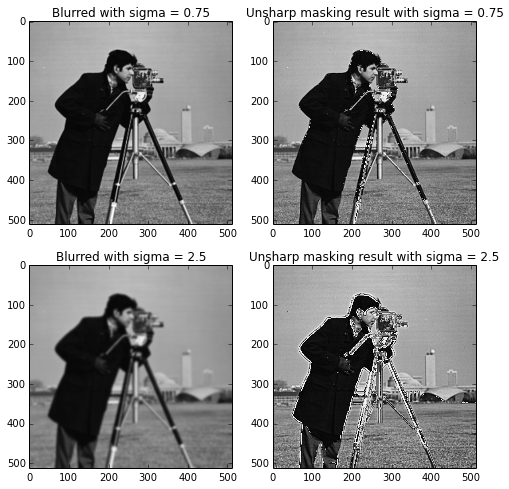

In [153]:
rcParams['figure.figsize'] = 8, 8
fig = plt.figure()


im1 = io.imread('Images/Q1/cameraman.jpg').astype('float64')
im_filtered_75 = scipy.ndimage.gaussian_filter(im1,.75)
im_unsharped_75 = unsharpMasking(im1,im_filtered_75)

#im_unsharped_75[np.where(im_unsharped_75>1)] = 1
im_filtered_250 = scipy.ndimage.gaussian_filter(im1,2.5)
im_unsharped_250 = unsharpMasking(im1,im_filtered_250)
#im_unsharped_250[np.where(im_unsharped_250>1)] = 1
fig, axes = plt.subplots(nrows=2,ncols=2)
axes[0,0].set_title('Blurred with sigma = 0.75')
axes[1,0].set_title('Blurred with sigma = 2.5')
axes[0,1].set_title('Unsharp masking result with sigma = 0.75')
axes[1,1].set_title('Unsharp masking result with sigma = 2.5')


axes[0,0].imshow(im_filtered_75)
axes[0,1].imshow(im_unsharped_75)
axes[1,0].imshow(im_filtered_250)
axes[1,1].imshow(im_unsharped_250)


plt.show()



In [151]:
np.where(im_unsharped_250<-1)

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))

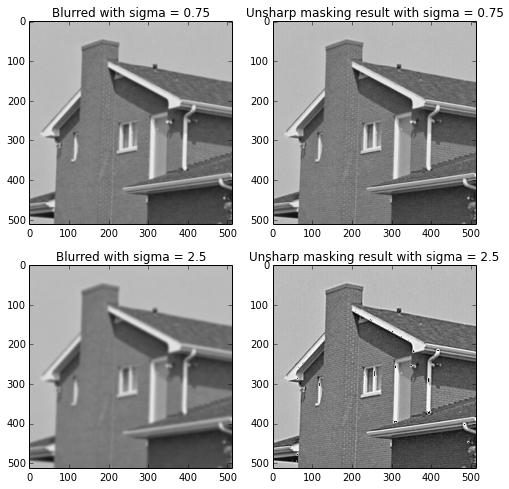

In [86]:
im2 = (io.imread('Images/Q1/house.jpg',dtype='float64'))/255.0
im2_filtered_75 = scipy.ndimage.gaussian_filter(im2,.75)
im2_unsharped_75 = unsharpMasking(im2,im2_filtered_75)
im2_filtered_250 = scipy.ndimage.gaussian_filter(im2,2.5)
im2_unsharped_250 = unsharpMasking(im2,im2_filtered_250)
rcParams['figure.figsize'] = 8, 8

fig, axes = plt.subplots(nrows=2,ncols=2)
axes[0,0].set_title('Blurred with sigma = 0.75')
axes[1,0].set_title('Blurred with sigma = 2.5')
axes[0,1].set_title('Unsharp masking result with sigma = 0.75')
axes[1,1].set_title('Unsharp masking result with sigma = 2.5')


axes[0,0].imshow(im2_filtered_75)
axes[0,1].imshow(im2_unsharped_75)
axes[1,0].imshow(im2_filtered_250)
axes[1,1].imshow(im2_unsharped_250)


plt.show()


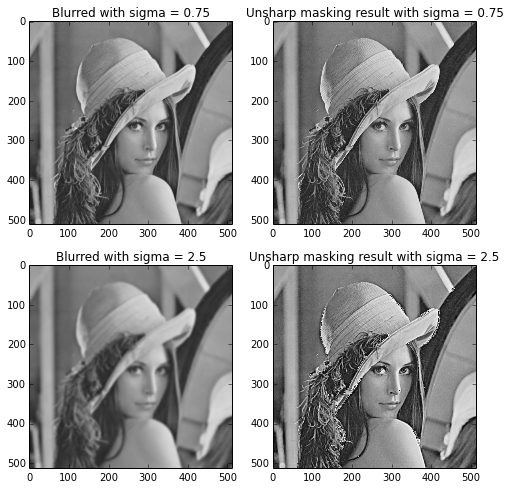

In [87]:
im3 = (io.imread('Images/Q1/lena.jpg',dtype='float64'))/255.0
im3_filtered_75 = scipy.ndimage.gaussian_filter(im3,.75)
im3_unsharped_75 = unsharpMasking(im3,im3_filtered_75)
im3_filtered_250 = scipy.ndimage.gaussian_filter(im3,2.5)
im3_unsharped_250 = unsharpMasking(im3,im3_filtered_250)
rcParams['figure.figsize'] = 8, 8

fig, axes = plt.subplots(nrows=2,ncols=2)
axes[0,0].set_title('Blurred with sigma = 0.75')
axes[1,0].set_title('Blurred with sigma = 2.5')
axes[0,1].set_title('Unsharp masking result with sigma = 0.75')
axes[1,1].set_title('Unsharp masking result with sigma = 2.5')



axes[0,0].imshow(im3_filtered_75, vmin=0, vmax=1)
axes[0,1].imshow(im3_unsharped_75, vmin=0, vmax=1)
axes[1,0].imshow(im3_filtered_250, vmin=0, vmax=1)
axes[1,1].imshow(im3_unsharped_250, vmin=0, vmax=1)


plt.show()



In [ ]:
#Q1.4
#filter 1: gaussian filter
#filter 2: range filter // maximum - minimum
#filter 3: bilateral filter

    

In [117]:
import cv2
im1 = io.imread('Images/Q1/cameraman.jpg',dtype='float64')/255.0
im2 = io.imread('Images/Q1/house.jpg',dtype='float64')/255.0
im3 = io.imread('Images/Q1/lena.jpg',dtype='float64')/255.0

im1 = im1[:,:,0]
im2 = im2[:,:,0]
im3 = im3[:,:,0]

#def addNoise(img):
imN = np.zeros(im1.shape)
cv2.randu(imN,(0),(0.3))
im1New = im1+imN
im2New = im2+imN
im3New = im3+imN

im1New[np.where(im1New>1)] = 1
im2New[np.where(im2New>1)] = 1
im3New[np.where(im3New>1)] = 1


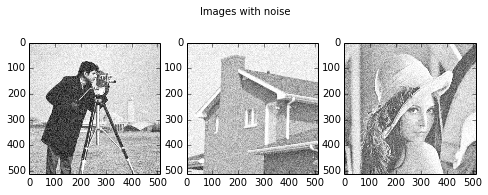

In [118]:
#Images with noise only
rcParams['figure.figsize'] = 8, 3

fig, axes = plt.subplots(nrows=1,ncols=3)
fig.suptitle('Images with noise')
axes[0].imshow(im1New, cmap = cm.Greys_r,vmin=0, vmax=1)
axes[1].imshow(im2New, cmap = cm.Greys_r,vmin=0, vmax=1)
axes[2].imshow(im3New,cmap = cm.Greys_r, vmin=0, vmax=1)


plt.show()




In [132]:
#filtering before and after adding noise
from skimage.morphology import square
from skimage.restoration import denoise_bilateral
from skimage.filters.rank import minimum,maximum
im1Gaussian = scipy.ndimage.gaussian_filter(im1,1.5)
im1Range = maximum(im1,square(3,dtype='float64')) - minimum(im1,square(3,dtype='float64'))
im1Bilateral = denoise_bilateral(im1,3,sigma_spatial=1.5)

im1Gaussian_N = scipy.ndimage.gaussian_filter(im1New,1.5)
im1Range_N = maximum(im1New,square(3,dtype='float64')) - minimum(im1New,square(3,dtype='float64'))
im1Bilateral_N = denoise_bilateral(im1New,3,sigma_spatial=1.5)





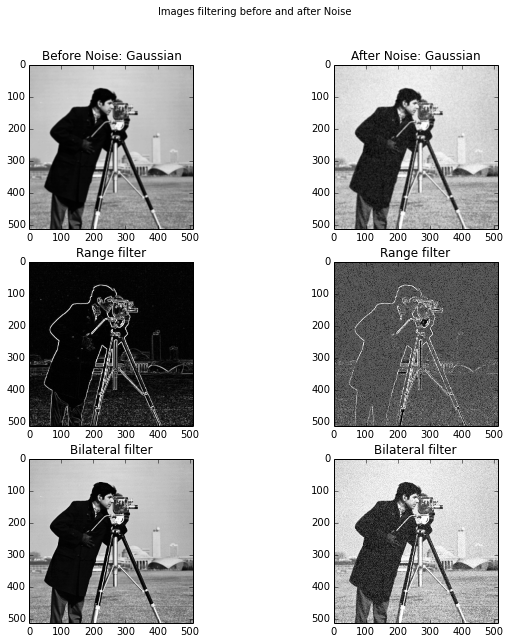

In [138]:
#Images with noise only
rcParams['figure.figsize'] = 10, 10

fig, axes = plt.subplots(nrows=3,ncols=2)
fig.suptitle('Images filtering before and after Noise')
axes[0,0].set_title('Before Noise: Gaussian')
axes[0,1].set_title('After Noise: Gaussian')
axes[1,0].set_title('Range filter')
axes[1,1].set_title('Range filter')
axes[2,0].set_title('Bilateral filter')
axes[2,1].set_title('Bilateral filter')


axes[0,0].imshow(im1Gaussian, cmap = cm.Greys_r)
axes[0,1].imshow(im1Gaussian_N, cmap = cm.Greys_r)

axes[1,0].imshow(im1Range, cmap = cm.Greys_r)
axes[1,1].imshow(im1Range_N, cmap = cm.Greys_r)

axes[2,0].imshow(im1Bilateral, cmap = cm.Greys_r)
axes[2,1].imshow(im1Bilateral_N, cmap = cm.Greys_r)

plt.show()





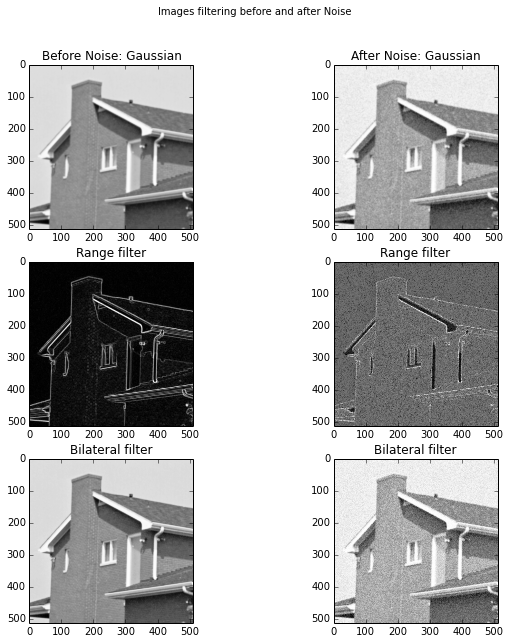

In [140]:
#filtering before and after adding noise
from skimage.morphology import square
from skimage.restoration import denoise_bilateral
from skimage.filters.rank import minimum,maximum
im2Gaussian = scipy.ndimage.gaussian_filter(im2,1.5)
im2Range = maximum(im2,square(3,dtype='float64')) - minimum(im2,square(3,dtype='float64'))
im2Bilateral = denoise_bilateral(im2,3,sigma_spatial=1.5)

im2Gaussian_N = scipy.ndimage.gaussian_filter(im2New,1.5)
im2Range_N = maximum(im2New,square(3,dtype='float64')) - minimum(im2New,square(3,dtype='float64'))
im2Bilateral_N = denoise_bilateral(im2New,3,sigma_spatial=1.5)

#Images with noise only
rcParams['figure.figsize'] = 10, 10

fig, axes = plt.subplots(nrows=3,ncols=2)
fig.suptitle('Images filtering before and after Noise')
axes[0,0].set_title('Before Noise: Gaussian')
axes[0,1].set_title('After Noise: Gaussian')
axes[1,0].set_title('Range filter')
axes[1,1].set_title('Range filter')
axes[2,0].set_title('Bilateral filter')
axes[2,1].set_title('Bilateral filter')


axes[0,0].imshow(im2Gaussian, cmap = cm.Greys_r)
axes[0,1].imshow(im2Gaussian_N, cmap = cm.Greys_r)

axes[1,0].imshow(im2Range, cmap = cm.Greys_r)
axes[1,1].imshow(im2Range_N, cmap = cm.Greys_r)

axes[2,0].imshow(im2Bilateral, cmap = cm.Greys_r)
axes[2,1].imshow(im2Bilateral_N, cmap = cm.Greys_r)

plt.show()




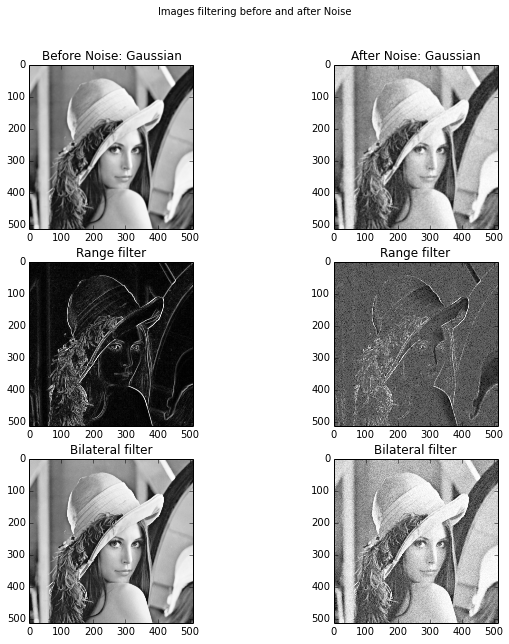

In [142]:
#filtering before and after adding noise
from skimage.morphology import square
from skimage.restoration import denoise_bilateral
from skimage.filters.rank import minimum,maximum
im3Gaussian = scipy.ndimage.gaussian_filter(im3,1.5)
im3Range = maximum(im3,square(3,dtype='float64')) - minimum(im3,square(3,dtype='float64'))
im3Bilateral = denoise_bilateral(im3,3,sigma_spatial=1.5)

im3Gaussian_N = scipy.ndimage.gaussian_filter(im3New,1.5)
im3Range_N = maximum(im3New,square(3,dtype='float64')) - minimum(im3New,square(3,dtype='float64'))
im3Bilateral_N = denoise_bilateral(im3New,3,sigma_spatial=1.5)

#Images with noise only
rcParams['figure.figsize'] = 10, 10

fig, axes = plt.subplots(nrows=3,ncols=2)
fig.suptitle('Images filtering before and after Noise')
axes[0,0].set_title('Before Noise: Gaussian')
axes[0,1].set_title('After Noise: Gaussian')
axes[1,0].set_title('Range filter')
axes[1,1].set_title('Range filter')
axes[2,0].set_title('Bilateral filter')
axes[2,1].set_title('Bilateral filter')


axes[0,0].imshow(im3Gaussian, cmap = cm.Greys_r)
axes[0,1].imshow(im3Gaussian_N, cmap = cm.Greys_r)

axes[1,0].imshow(im3Range, cmap = cm.Greys_r)
axes[1,1].imshow(im3Range_N, cmap = cm.Greys_r)

axes[2,0].imshow(im3Bilateral, cmap = cm.Greys_r)
axes[2,1].imshow(im3Bilateral_N, cmap = cm.Greys_r)

plt.show()

